LINEAR REGRESSION ON HISTORICAL_DATA_APPLE

In [21]:
#importing google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing all the necessary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading the .csv file using pandas
data=pd.read_csv('/content/drive/MyDrive/Datasets-ML/Datasets/Nasdaq Stocks/HistoricalData_APPLE.csv',index_col="Date",parse_dates=True)

In [4]:
#top 5 rows of the data
data.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,$127.13,56877940,$127.21,$127.75,$126.52
2021-06-08,$126.74,74403770,$126.6,$128.46,$126.2101
2021-06-07,$125.9,71057550,$126.17,$126.32,$124.8321
2021-06-04,$125.89,75169340,$124.07,$126.16,$123.85
2021-06-03,$123.54,76229170,$124.68,$124.85,$123.13


In [5]:
#converting each columnns datatypes from string to float
data['Open']=data['Open'].str.replace('$','').astype(float)
data['Close/Last']=data['Close/Last'].str.replace('$','').astype(float)
data['High']=data['High'].str.replace('$','').astype(float)
data['Low']=data['Low'].str.replace('$','').astype(float)

In [6]:
#defining the dependent and independent varaiable as x and y
y=data['Close/Last']
x=data.drop('Close/Last',axis=1)

In [7]:
data.dtypes

Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

In [8]:
print(len(x))
print(len(y))

2516
2516


In [9]:
#import all the necessary library for Linear regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix,accuracy_score

In [10]:
#Divide the data into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
#Independent variables as x
x_test.columns

Index(['Volume', 'Open', 'High', 'Low'], dtype='object')

In [12]:
#creating an object of the LinearRegression function
model=LinearRegression()

In [14]:
#Fit the model with parameter x_train and y_train
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#Predict the dependent variable y_predict by the independent variable x_test 
y_predict=model.predict(x_test)

In [16]:
#Root mean square error caculation
rmse=mean_squared_error(y_test,y_predict)

In [17]:
#R-squared calculation
r2=r2_score(y_test,y_predict)

In [18]:
#coefficient of the model
coefficient=model.coef_

In [19]:
#Intercept of the model
intercept=model.intercept_

In [20]:
#Print each data 
print('rmse=',rmse)
print('r2=',r2)
print('coefficient=',coefficient)
print('intercept=',intercept)

rmse= 0.1459830874093662
r2= 0.9998357614326422
coefficient= [-7.22550815e-11 -5.28400606e-01  8.40707220e-01  6.86442758e-01]
intercept= 0.019101983808461398


In [21]:
d={'y_test':y_test,'y_predict':y_predict}

In [22]:
a=pd.DataFrame(data=d)

<Figure size 1440x576 with 0 Axes>

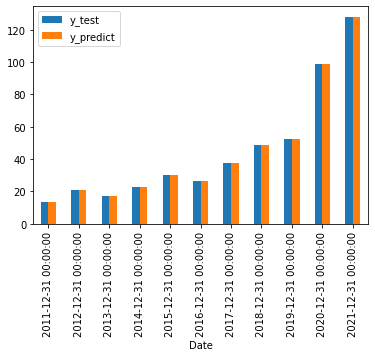

In [23]:
#A bar plot to visualise y_test and Y_predict
plt.figure(figsize=(20,8))
a.resample('Y').mean().plot(kind="bar")

END
